In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, explained_variance_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data/diamonds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    217 non-null    float64
 1   cut      217 non-null    object 
 2   color    217 non-null    object 
 3   clarity  217 non-null    object 
 4   depth    217 non-null    float64
 5   table    217 non-null    float64
 6   price    217 non-null    int64  
 7   x        217 non-null    float64
 8   y        217 non-null    float64
 9   z        217 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 17.1+ KB


## Формат даних

In [3]:
df.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Статистичні показники

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,217.000000,217.00000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.542166,61.67235,57.738249,1800.502304,5.107650,5.113594,3.151567
std,0.236795,1.62938,2.351352,1154.679710,0.825937,0.814759,0.510581
min,0.200000,55.10000,53.000000,326.000000,3.790000,3.750000,2.270000
25%,0.300000,60.90000,56.000000,404.000000,4.250000,4.270000,2.650000
50%,0.700000,61.70000,57.000000,2761.000000,5.630000,5.620000,3.460000
75%,0.720000,62.60000,59.000000,2771.000000,5.800000,5.800000,3.570000
max,1.170000,67.90000,69.000000,2781.000000,6.830000,6.900000,4.130000


## Перевірка пропущенних значень

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Перевірка дублікатів

In [6]:
df.duplicated().sum()

0

## Перетворення категоріальних значень в числові

In [7]:
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

## Перевірка кореляції між ознаками

<Axes: >

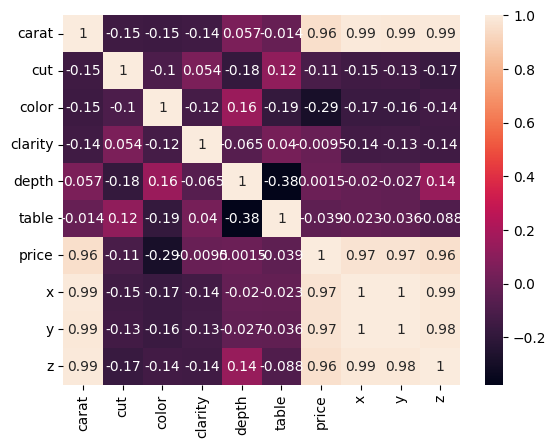

In [8]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

## Вибір ознак та розділення даних

In [9]:
# В даному випадку ми хочемо прогнозувати ціну діаманта та вважаємо що ціна сильно залежить від
# його ваги та розмірів (довжини, ширини та глибини відповідно) (згідно результатам на heatmap).

X = df[['carat', 'x', 'y', 'z']] # Незалежні ознаки
y = df['price']                  # Залежна ознака

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Створення моделі

In [10]:
lm = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LinearRegression()),
]).fit(X_train, y_train)

## Перевірка роботи моделі на тестовому наборі за допомогою різних метрик

In [11]:
preds = lm.predict(X_test)

corr = np.corrcoef(y_test, preds)[0][1]
r_squared = r2_score(y_test, preds)
mae = explained_variance_score(y_test, preds)

print(corr, r_squared, mae)

0.9653652260032356 0.9309003813771984 0.9319022820409938


## Візуалізація розбіжності між фактичними значеннями та прогнозованими

<Axes: ylabel='price'>

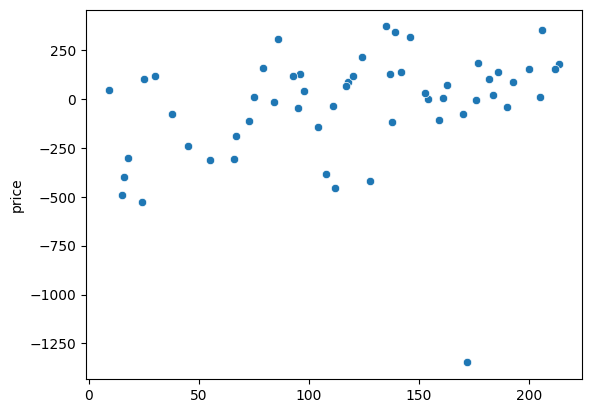

In [12]:
residuals = y_test - preds
sns.scatterplot(residuals)

<Axes: xlabel='price', ylabel='Density'>

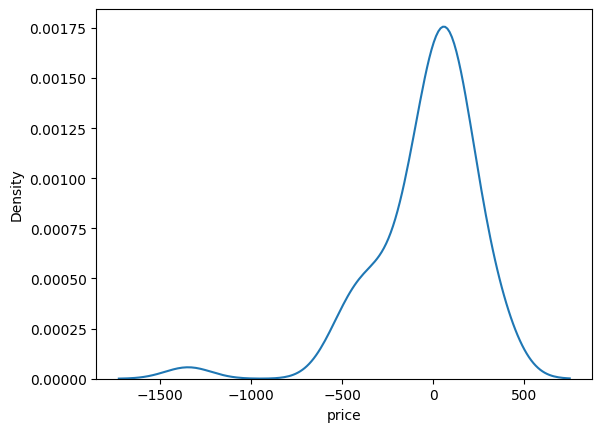

In [13]:
sns.kdeplot(residuals)

## Кластеризація даних

In [14]:
kmeans_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42)),
])

kmeans_data = df[['carat', 'price']]
kmeans_pipeline.fit(kmeans_data)

Pipeline(steps=[('scale', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

## Візуалізація кластерів

<Axes: xlabel='carat', ylabel='price'>

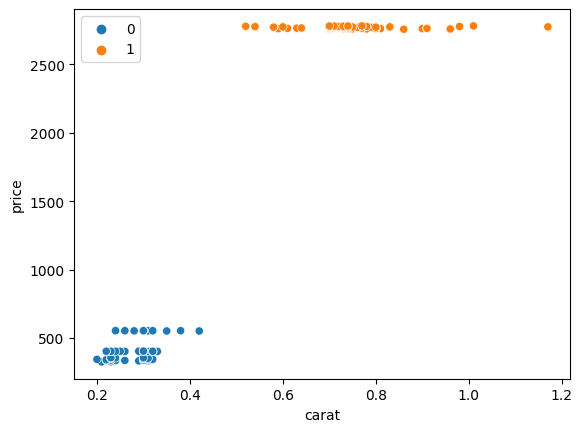

In [15]:
sns.scatterplot(
    x=df['carat'],
    y=df['price'],
    hue=kmeans_pipeline.predict(kmeans_data),
)

## Оцінка кластерів

In [16]:
ss = silhouette_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))
dbs = davies_bouldin_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))
chs = calinski_harabasz_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

print(f'Коефіцієнт силуету: {ss}\nОцінка Девіса-Болдіна: {dbs}\nОцінка Калінського та Харабаса: {chs}')

Коефіцієнт силуету: 0.980899190464647
Оцінка Девіса-Болдіна: 0.036875109683412864
Оцінка Калінського та Харабаса: 87411.31307957025
